## 1. Installing the required dependencies

In [1]:
#!pip install pandas,numpy,matplotib,seaborn

##  2.Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 3.Load the Dataset and create the Data Frame 

In [3]:
#importing the DataSet
df = pd.read_csv('50_Startups.csv')

## 3.Basic information (Understanding) of DataFrame

### 3.1.Check the Shape of DataFrame 

In [4]:
#Rows and columns
df.shape

(50, 4)

In [5]:
df.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


### 3.2 Viewing the First Five rows of dataframe

In [6]:
#View First Five rows of dataframe
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### 3.2 Check the Datatypes of Features

In [7]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
Profit             float64
dtype: object

### 3.3 Describing the DataSet Statistically

In [8]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### 3.4.Info about the dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


### 4.Visualization(Understanding the data through visualization)

We must understand our data in order to get the best results from ML agorithms.

The fastest way to learn more about our data is to use data visualization techniques.

     -->Here we are using Histograms,Density plots,Box and Wisker plots

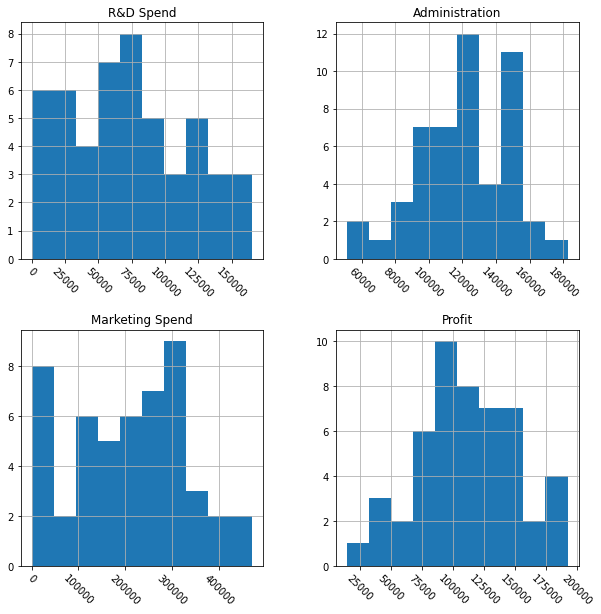

In [10]:
#plot histogram grid
df.hist(xrot=-45, figsize=(10, 10))
plt.show()

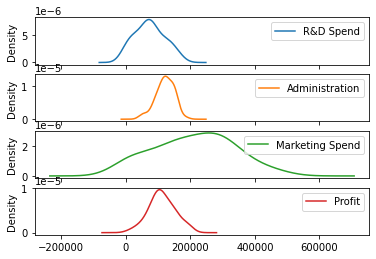

In [11]:
#Density Plots
df.plot(kind = 'density', subplots=True, sharex=True)
plt.show()

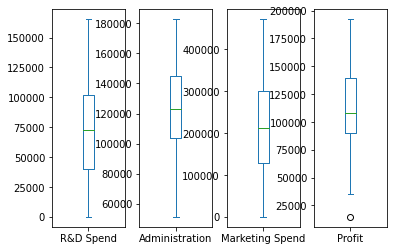

In [12]:
#Box and Whisker Plots
df.plot(kind= 'box', subplots=True, sharex=False, sharey=False)
plt.show()

### 4.1 Coorelation Matrix Plot.
      Here coorelation refers to the relationship between two variables.
      A coorelation of -1 or 1 shows a full 'negative' or "positive coorelation" respectively.Whereas a value of '0' shows no Coorelation at all.
      Ex: If two variables change in the same direction they are positively coorelated.
      If they change in opposite directions together (one goes up,one goes down) then they are negetively coorelated 
      
      This can be useful because,some ML algorithms like linear,logistic regression can have poor performance if they are highly coorelated in our input data.

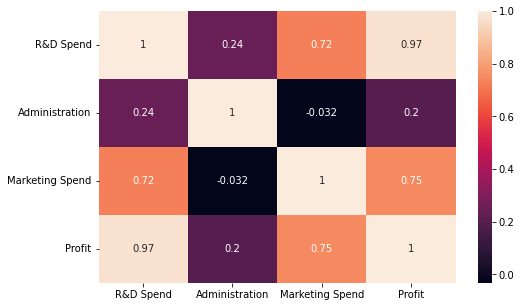

In [13]:
# coorelation matrix for finding most significant variables
import seaborn as sns
plt.figure(figsize=(8,5))
coorelation = df.corr().round(4)
sns.heatmap(data = coorelation,annot=True)
plt.show()

In [14]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


### 4.2 Scatter plot matrix

In [15]:
from pandas.plotting import scatter_matrix

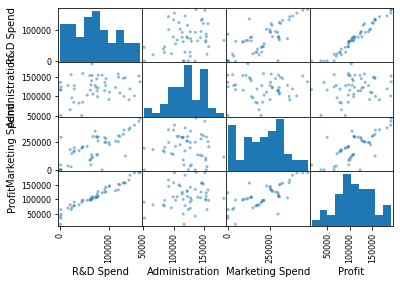

In [16]:
scatter_matrix(df)
plt.show()

## 5.Data Cleaning 

### 5.1 Check for the Duplicates

In [17]:
# Check the number of Rows before Removing Duplicates
df.shape

(50, 4)

In [18]:
df = df.drop_duplicates()

In [19]:
df.shape

(50, 4)

#### NO Duplicates in the given dataset

### 5.2 Check the NULL values

In [20]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

### No NULL values in the given dataset

In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


## 6.Create Dependent(y) and Independent(X) Variables

In [22]:
target_feature = 'Profit'

y = df[target_feature]

X = df.drop(target_feature, axis=1)

In [23]:
X.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [24]:
X.shape

(50, 3)

In [25]:
y.shape

(50,)

## 7.Split Dataset to Train and Test

We have to split our dataset into 2 sets.
      Training set which is used by the model for training and test set which is used to test our trained model.

   This helps to check the accuracy of model and we can also check the model is biased towards dataset or not

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1 
                                                   )

## 8.Build the model using LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
modelLR.fit(X_train, y_train)

LinearRegression()

In [30]:
modelLR.score(X_test, y_test)

0.9650940934427323

In [33]:
modelLR.predict([[165349.2, 136897.8, 471784.1]])

D:\Anaconda\envs\expo\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([190318.42240258])

## Calculating different regression metrics.

In [34]:
y_pred = modelLR.predict(X_test)

In [35]:
from sklearn import metrics

In [36]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7659.1190328146895
MSE: 79195300.7280721
RMSE: 8899.174159891023


In [37]:
metrics.r2_score(y_test, y_pred)

0.9650940934427323

## 8.1 Building model using Support Vector Regressor

In [38]:
from sklearn.svm import SVR
model2 = SVR()
model2.fit(X_train, y_train)

SVR()

In [39]:
model2.score(X_test, y_test)

-0.03527197856194353

## 8.2 Building model using RandomForest

In [40]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [41]:
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9428860732301226

In [49]:
rf.predict([[165349.2, 136897.8, 471784.1]])

D:\Anaconda\envs\expo\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([186155.3073])

## 8.3 Building model using Ridge Regressor

In [43]:
from sklearn.linear_model import Ridge
model3 = Ridge()

In [44]:
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.9650940934395877

## 8.4 Building model using DecisionTree

In [45]:
from sklearn import tree
model4 = tree.DecisionTreeRegressor()

In [46]:
model4.fit(X_train,y_train)
model4.score(X_test,y_test)

0.9262196965255295

## 8.5 Building model using Lasso Regressor

In [47]:
from sklearn.linear_model import Lasso
model5 = Lasso()

In [48]:
model5.fit(X_train, y_train)
model5.score(X_test, y_test)

0.9650940935432861

### As Shown Above LinearRegression is Performing best in this dataset among other Algorithms.
### Hence Let's Serialize LinearRegression model using "pickle" Module.

In [80]:
import pickle
with open('lr', 'wb') as file:
   pickle.dump(modelLR, file)